In [ ]:
#Austin Bray 
#ME 592 Homework 1 Code


Mounted at /content/mnt


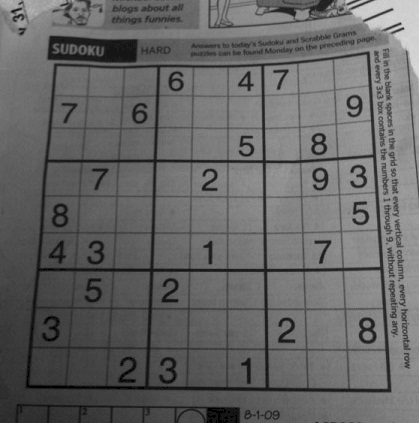

In [ ]:
##Task 2.1 Part 1: Import Image

#Import Packages
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
#This enables the size of the figures in this assigment to be larger. 
new_size = plt.rcParams["figure.figsize"]= (15,7)
#Load image
image = cv2.imread('sudoku-original.png', 0)
#Display Image
cv2_imshow(image)

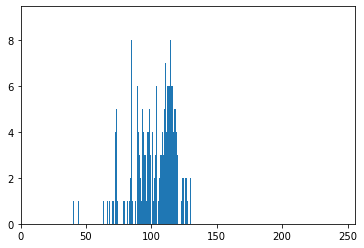

In [ ]:
#2.1 Pt 2: Import Histogram of Intensities
#Plot a histogram of the image. 
#plt.hist(image)
#Flattening based from: https://stackoverflow.com/questions/22159160/python-calculate-histogram-of-image
#This flattens from 2D image to 1D
flattened = image.mean(axis=1).flatten()
#Create plot of histogram. 
b, bins, patches = plt.hist(flattened, 256)
plt.xlim([0,256])
plt.show()

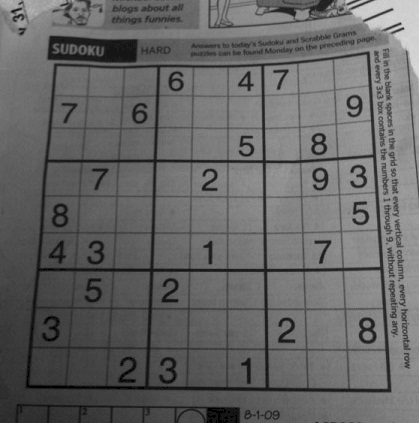

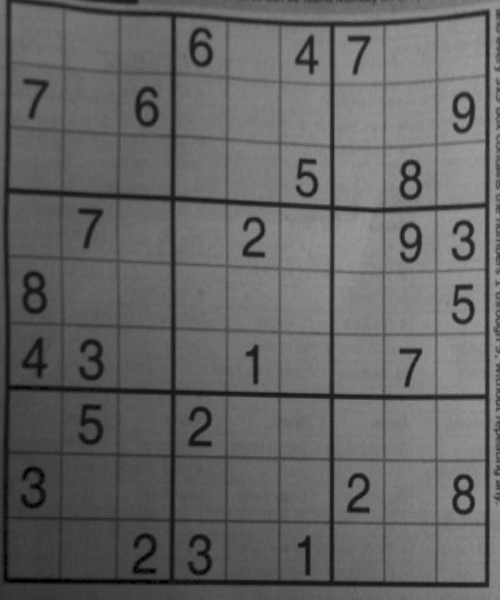

In [ ]:
#2.1 Pt 3: Choose 4 points to perform a Perspective Transformation to obtain a proper square. 
#"Geeks for Geeks Perspective Transform" taught me the "getPers..." and "warpPersp..." commands
#within cv2, which is the basis for this code. 
#Import numpy package, cv2 already imported. 
import numpy as np
#I manually found the initial points that I wanted to select as the transformed corners. 
initalpts = np.float32([[50,65], [475,40], [20,425], [520,430]])
transformpts = np.float32([[0,0], [640,0], [0,640], [640,640]])
#Create matrix from intitial -> transform coordinates. 
matrix = cv2.getPerspectiveTransform(initalpts, transformpts)
result = cv2.warpPerspective(image, matrix, (500,600))
#Plot resulting image. 
cv2_imshow(image)
cv2_imshow(result)



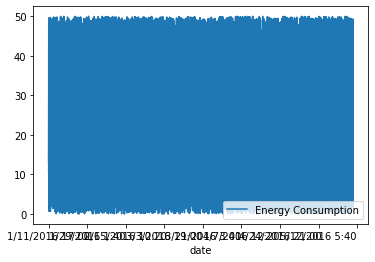

In [ ]:
#2.2 Part 1: Plot appliances energy consumption for whole period and one week. 
#Import pandas package
import pandas as pd
#This imports the energy data file as "timedata"
timedata = pd.read_csv('energydata_complete.csv')
#Creates "energyconsum" variable that is just one column of timedata. No longer used in this section. 
energyconsum = timedata["Energy Consumption"]
#Pulls the two columns needed for plotting. 
timedata.plot(x = "date", y = "Energy Consumption")



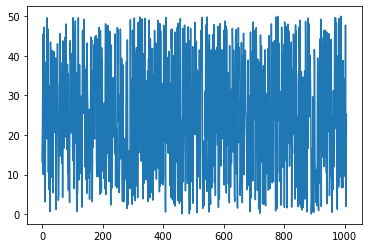

In [ ]:
energyweek = energyconsum[0:1007]
#Plots just the one week worth of data on energy consumption.   
energyweek.plot()


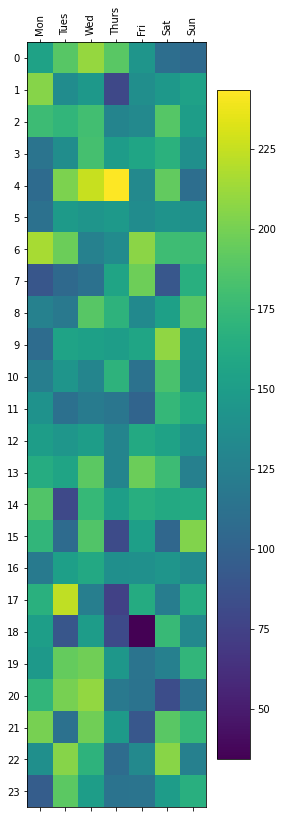

In [ ]:
#2.2 Pt 2: Heatmap

#This section prooved difficult, syntax was too foriegn for me to figure out without help from resources and classmates. 
#https://machinelearningmastery.com/time-series-data-visualization-with-python/

#Import pandas directories needed. 
from pandas import DataFrame
from pandas import Grouper
#Create date time series
datetimeSeries = pd.to_datetime(timedata['date'])
datetimeIndex = pd.DatetimeIndex(datetimeSeries.values)
#parse unneccesary columns. 
df = timedata.set_index(datetimeIndex)
df.drop(columns=['date','Appliances','lights','T1','RH_1','T2', 'RH_2', 'T3', 'RH_3', 'T4','RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9','RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility','Tdewpoint'],inplace = True)

groups = df.groupby(Grouper(freq='H'))
#Empty shape for map.
mat = np.empty((24, 7, 1))
#Sort into matrix. 
for name, group in groups:
  mat[name.hour, name.day_of_week]=sum(group.values)
  if name.hour > 22 and name.day_of_week > 6:
    print("break")
    break

h = plt.matshow(mat.squeeze(), interpolation="None", aspect='auto')
plt.yticks(ticks=np.arange(24))
names = ["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"]
plt.xticks(ticks=np.arange(len(names)),labels=names,rotation=90)
plt.colorbar(h)



(array([2024., 1932., 2018., 1953., 1984., 1963., 1932., 1919., 1963.,
        2047.]),
 array([5.32168200e-03, 5.00444248e+00, 1.00035633e+01, 1.50026841e+01,
        2.00018049e+01, 2.50009257e+01, 3.00000465e+01, 3.49991673e+01,
        3.99982881e+01, 4.49974089e+01, 4.99965297e+01]),
 <a list of 10 Patch objects>)

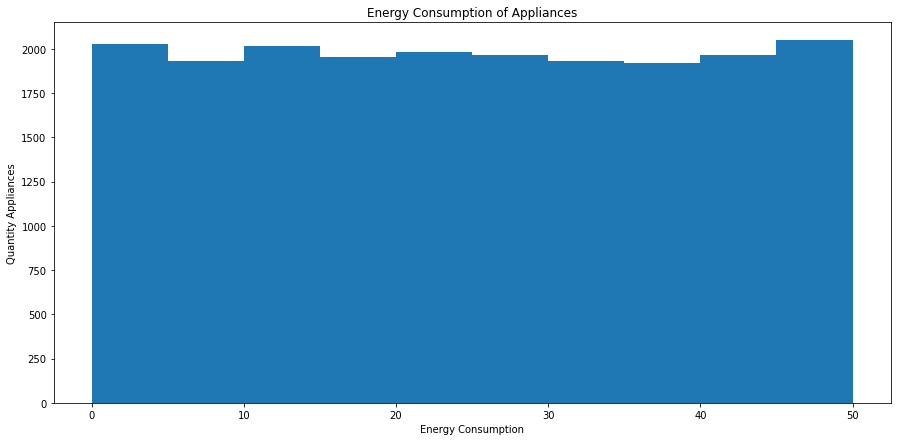

In [ ]:
#2.2 Pt 3: Plot histogram of energy consumption of the appliances. 
plt.title('Energy Consumption of Appliances')
plt.xlabel('Energy Consumption')
plt.ylabel('Quantity Appliances')
plt.hist(timedata["Energy Consumption"])

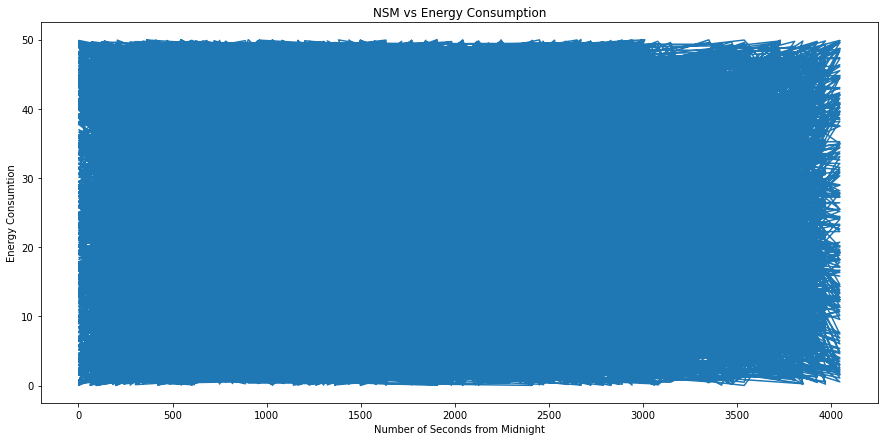

In [ ]:
#2.2 Part 4: Create a feature variable NSM (number of seconds from midnight) and plot energy consumption vs NSM.

#Blank variable
NSM = []
#Loop adds the total number of seconds calculated at each time. 
for i in datetimeIndex:
  #Conversion from HMS to Seconds only.
  NSM.append(i.hour*60^2 + i.minute*60 + i.second)

plt.xlabel('Number of Seconds from Midnight')
plt.ylabel('Energy Consumtion')
plt.title('NSM vs Energy Consumption')
plt.plot(NSM, energyconsum)




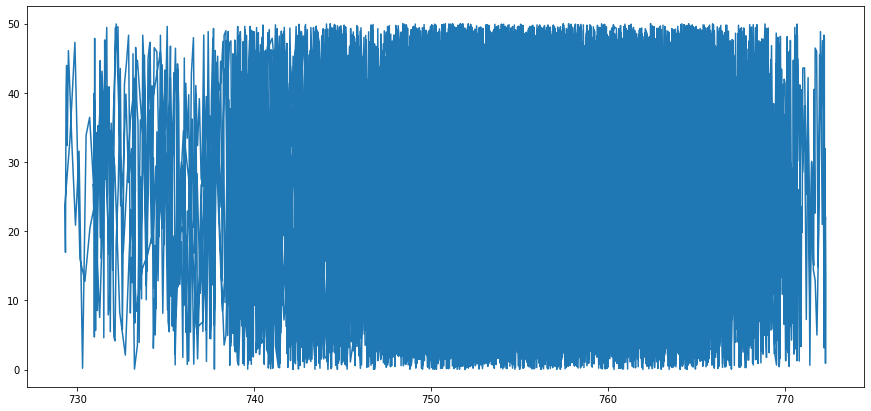

In [ ]:
#2.2 Part 5: Plot pressure vs energy consumption. 

pressure = timedata["Press_mm_hg"]

plt.plot(pressure,energyconsum)

In [ ]:
#2.2 Part 6

#NSM is a metric of time which indicates when peak usage of appliances/power is for consumers. 
#This, with the heat map, indicates that the maximum usage has been observed during times where users are home and using power.
#It is worth noting that the resuting heat map and plot of pressure indicates very little supporting data for a strong correlation between 
#energy consumption and the data points. This is expected to occure, but is obscured by the quantity of data. 

In [ ]:
#2.3 Multi-Variate Work 
#I imported packages that are used for both solving statistical data and dealing with the .dat file format. 
import statistics as stat
import itertools
import scipy
from scipy.stats import kurtosis
#Imports the dat as an array with tuples in each element
airfoil = np.genfromtxt('airfoil_self_noise.dat')
#Breaks array of tuples into list of individual numbers, though format not ideal.
aflist = list(itertools.chain(*airfoil))
#Pull each value out of list. 
Freq = aflist[0:9012:6]
Angle = aflist[1:9013:6]
Chord = aflist[2:9014:6]
Velo = aflist[3:9015:6]
DispS = aflist[4:9016:6]
ScalePress = aflist[5:9016:6]
#Calculate each statistical value for each variable. 
#MEAN
AFmean= [np.mean(Freq), np.mean(Angle), np.mean(Chord), np.mean(Velo), np.mean(DispS), np.mean(ScalePress)]
#VARIENCE
AFVar = [np.var(Freq), np.var(Angle), np.var(Chord), np.var(Velo), np.var(DispS), np.var(ScalePress)]
#MEDIAN
AFMed = [np.median(Freq), np.median(Angle), np.median(Chord), np.median(Velo), np.median(DispS), np.median(ScalePress)]
#KURTOSIS
AFKurt = [scipy.stats.kurtosis(Freq), scipy.stats.kurtosis(Angle), scipy.stats.kurtosis(Chord), scipy.stats.kurtosis(Velo), scipy.stats.kurtosis(DispS), scipy.stats.kurtosis(ScalePress)]
#SKEWDNESS
AFSkew = [scipy.stats.skew(Freq), scipy.stats.skew(Angle), scipy.stats.skew(Chord), scipy.stats.skew(Velo), scipy.stats.skew(DispS), scipy.stats.skew(ScalePress)]
#RANGE
AFRange = [[np.min(Freq),np.max(Freq)], [np.min(Angle),np.max(Angle)], [np.min(Chord),np.max(Chord)], [np.min(Velo),np.max(Velo)], [np.min(DispS),np.max(DispS)], [np.min(ScalePress),np.max(ScalePress)]]
#display the resulting statistical values. Downside if this code is the display is not very neat, will work on learning more effective display techniques. 
print(AFmean)
print(AFVar)
print(AFMed)
print(AFKurt)
print(AFSkew)
print(AFRange)


[2884.1078561917443, 6.776431424766977, 0.13657150466045273, 50.86824234354195, 0.011112111536617845, 124.84967909454063]
[9930954.030976895, 34.972440527587715, 0.008749054154726677, 242.42713392795397, 0.00017176968401558145, 47.30786766399705]
[1600.0, 5.4, 0.1016, 39.6, 0.00495741, 125.7225]
[5.698767613284705, -0.4101853167988079, -1.0399113972473681, -1.5633329099706952, 2.22064712742364, -0.33732817334841814]
[2.138061016026337, 0.6905481359285345, 0.4562009461087754, 0.2344690277153172, 1.7020311535894435, -0.4101838094501445]
[[200.0, 20000.0], [0.0, 22.2], [0.0254, 0.3048], [31.7, 71.3], [0.000400682, 0.0584113], [103.38, 140.987]]


# New Section